In [1]:
import pandas as pd

In [2]:
path = "/home/juanbetancur/analisis_datos_universidad/evento_evaluativo_4/ejercicio_3/amazon_review_lemmatized.parquet"
df = pd.read_parquet(path, engine="pyarrow")
df.head()

,rating,clean_title,clean_review,clean_review_stemming,clean_review_lemmatization
0,3,more like funchuck,gave this to my dad for a gag gift after direc...,gave dad gag gift direct nunsens got reall kick,give dad gag gift direct nunsense get reall kick
1,5,inspiring,i hope a lot of people hear this cd we need mo...,hope lot peopl hear cd need strong posit vibe ...,hope lot people hear cd need strong positive v...
2,5,the best soundtrack ever to anything,im reading a lot of reviews saying that this i...,im read lot review say best game soundtrack fi...,read lot review say good game soundtrack figur...
3,4,chrono cross ost,the music of yasunori misuda is without questi...,music yasunori misuda without question close s...,music yasunori misuda without question close s...
4,5,too good to be true,probably the greatest soundtrack in history us...,probabl greatest soundtrack histori usual bett...,probably great soundtrack history usually well...


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df['sentiment_bin'] = df.rating.apply(lambda x: 1 if x > 3 else 0)

In [5]:
df.head(3)

,rating,clean_title,clean_review,clean_review_stemming,clean_review_lemmatization,sentiment_bin
0,3,more like funchuck,gave this to my dad for a gag gift after direc...,gave dad gag gift direct nunsens got reall kick,give dad gag gift direct nunsense get reall kick,0
1,5,inspiring,i hope a lot of people hear this cd we need mo...,hope lot peopl hear cd need strong posit vibe ...,hope lot people hear cd need strong positive v...,1
2,5,the best soundtrack ever to anything,im reading a lot of reviews saying that this i...,im read lot review say best game soundtrack fi...,read lot review say good game soundtrack figur...,1


In [6]:
corpus = df['clean_review_lemmatization'].tolist()
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)


In [7]:
x = tfidf_matrix
y = df['sentiment_bin']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [10]:
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.714938509882365
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.69      0.96      0.80    435867
           1       0.84      0.35      0.50    290022

    accuracy                           0.71    725889
   macro avg       0.77      0.65      0.65    725889
weighted avg       0.75      0.71      0.68    725889



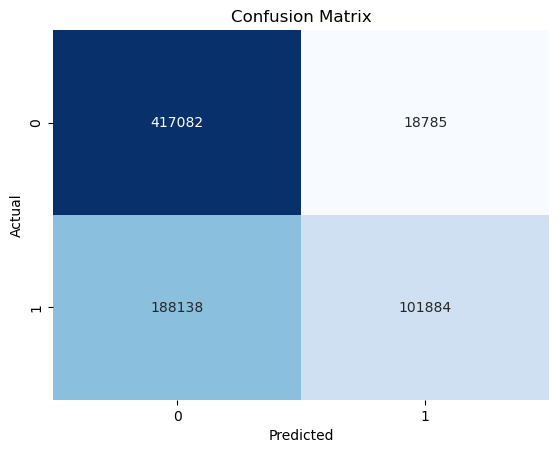

In [13]:
#matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show() 

In [11]:
import joblib
model_path = "/home/juanbetancur/analisis_datos_universidad/evento_evaluativo_4/ejercicio_3/naive_bayes_model.pkl"
joblib.dump(nb_classifier, model_path)

['/home/juanbetancur/analisis_datos_universidad/evento_evaluativo_4/ejercicio_3/naive_bayes_model.pkl']